In [1]:
import sys
import os
import re
import math
import h5py

sys.path.append(os.path.split(os.path.abspath(''))[0])
from base.read_matrix import MatrixDataReader
from geom.geometry import *
from base.common import *

import matplotlib.font_manager as fm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

fsave_set_save(False)
fsave_set_dpi(300)
fsave_set_pad_inches(0.2)
# %config InlineBackend.figure_format='svg'

In [2]:
sim_path = '../../run'
filepath = os.path.join(sim_path, 'diag')
filestr = 'DiagParticleField2D'
mean_num = 10
dz = 6.2500E-04
dr = dz

vacuum 0 {}
top electrode 1 {}
bottom electrode 1 {}
dielectric 2 {'permittivity': 2.2, 'permeability': 1.0, 'conductivity': 1.0}


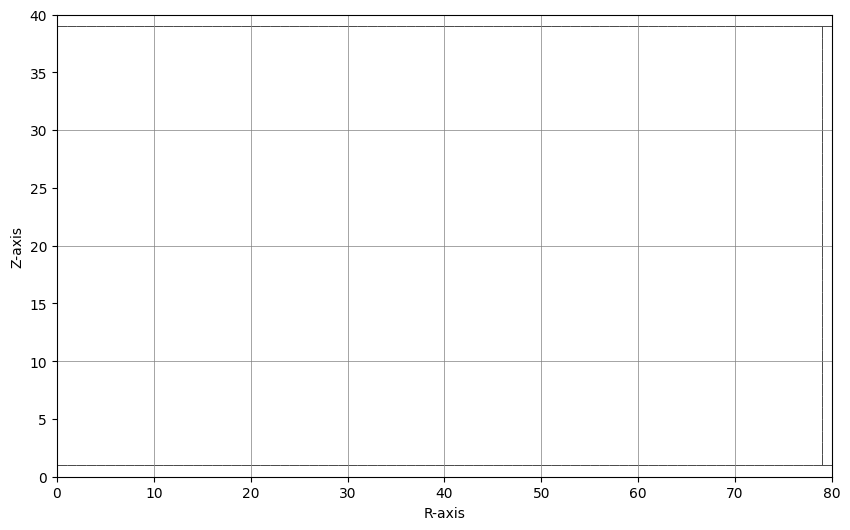

In [3]:
domain_info = get_domain_info(os.path.join(sim_path, 'check/domain.dat'))
g = Geometry(1, 1)
g.load(os.path.join(sim_path, 'input'))
Nz = g.Nz
Nr = g.Nr

plt.figure(figsize=(10, 6))

g.show_grid(is_create_fig=False)
draw_domain(domain_info[0], is_create_fig=False)

plt.xlabel('R-axis',)
plt.ylabel('Z-axis',)
plt.xlim([0, g.Nr-1])
plt.ylim([0, g.Nz-1])

fs('./domain')

In [4]:
dirPath = os.path.abspath(filepath)
subDirs = os.listdir(dirPath)
subDirs.sort(reverse=False)

if len(subDirs) > 0:
    tmpDir = list()

    for i in range(len(subDirs)):
        if len(re.findall(filestr+'_\d*[.]h5', subDirs[i])) > 0:
            tmpDir.append(subDirs[i])

    if len(tmpDir) > 0:
        subDirs = tmpDir
    else:
        print('The number of directories that meet the rule is 0.')
        exit(-1)

print('H5 file number: ', len(subDirs))

H5 file number:  10


In [5]:
time = np.array([i for i in range(len(subDirs))])
ne_mean = np.zeros((len(subDirs), 1))
ni_mean = np.zeros((len(subDirs), 3))
Te_mean = np.zeros((len(subDirs), 1))
Ti_mean = np.zeros((len(subDirs), 3))
phi_mean = np.zeros((len(subDirs), 1))

ro = 100
for j in range(math.ceil(len(subDirs)/ro)):
    start = j * ro
    stop = (j + 1) * ro
    if stop > len(subDirs):
        stop = len(subDirs)

    h5files = []
    for i in range(start, stop):
        h5files.append(h5py.File(os.path.join(dirPath, subDirs[i]), 'r'))

    for i in range(len(h5files)):
        ne_mean[i+start] = np.mean(h5files[i]['RhoOne-Electron'])
        ni_mean[i+start,0] = np.mean(h5files[i]['RhoOne-F-'])
        ni_mean[i+start,1] = np.mean(h5files[i]['RhoOne-CF3+'])
        ni_mean[i+start,2] = np.mean(h5files[i]['RhoOne-CF3-'])
        Te_mean[i+start] = np.mean(h5files[i]['EnergyOne-Electron'])
        Ti_mean[i+start,0] = np.mean(h5files[i]['EnergyOne-F-'])
        Ti_mean[i+start,1] = np.mean(h5files[i]['EnergyOne-CF3+'])
        Ti_mean[i+start,2] = np.mean(h5files[i]['EnergyOne-CF3-'])
        phi_mean[i+start] = np.mean(h5files[i]['Phi'])

    for i in range(len(h5files)):
        h5files[i].close()

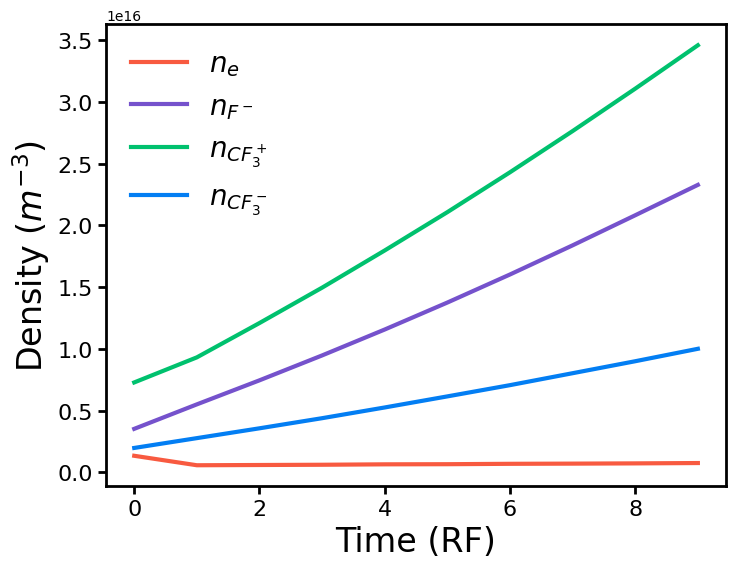

In [6]:
font, size = curvestyle()

plt.plot(time, ne_mean, lw=3, c=colors[0], label='$n_e$')
plt.plot(time, ni_mean[:,0], lw=3, c=colors[1], label='$n_{F^-}$')
plt.plot(time, ni_mean[:,1], lw=3, c=colors[2], label='$n_{CF_3^+}$')
plt.plot(time, ni_mean[:,2], lw=3, c=colors[3], label='$n_{CF_3^-}$')

plt.xlabel('Time (RF)', fontdict=font)
plt.ylabel('Density ($m^{-3}$)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size': 20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./ne-time')

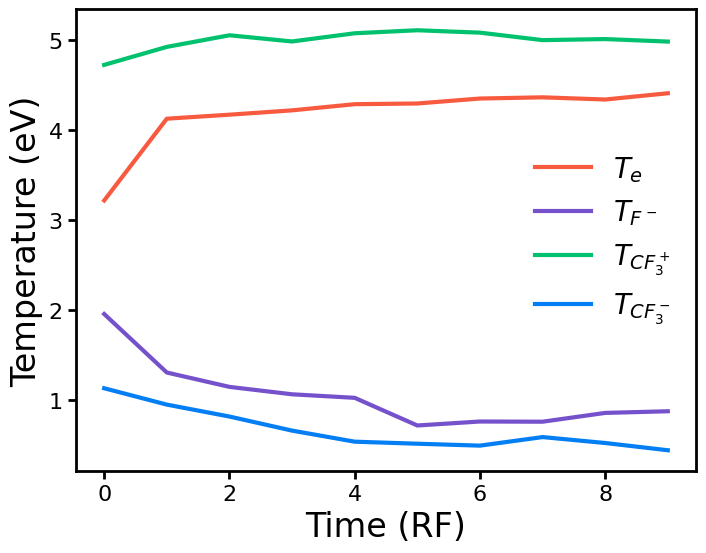

In [7]:
font, size = curvestyle()

plt.plot(time, Te_mean, lw=3, c=colors[0], label="$T_e$")
plt.plot(time, Ti_mean[:,0], lw=3, c=colors[1], label='$T_{F^-}$')
plt.plot(time, Ti_mean[:,1], lw=3, c=colors[2], label='$T_{CF_3^+}$')
plt.plot(time, Ti_mean[:,2], lw=3, c=colors[3], label='$T_{CF_3^-}$')

plt.xlabel('Time (RF)', fontdict=font)
plt.ylabel('Temperature (eV)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size': 20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./Te-time')

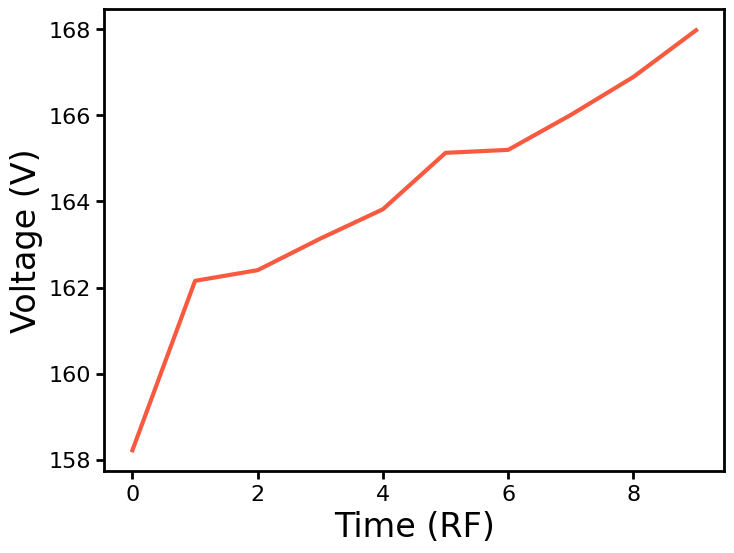

In [8]:
font, size = curvestyle()

plt.plot(time, phi_mean, lw=3, c=colors[0])

plt.xlabel('Time (RF)', fontdict=font)
plt.ylabel('Voltage (V)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
# plt.legend(prop={'size':20, 'family':'Arial'}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./vol-time')

In [9]:
# h5files = []
# print(len(subDirs)-mean_num, len(subDirs))
# for i in range(len(subDirs)-mean_num, len(subDirs)):
#     h5files.append(h5py.File(os.path.join(dirPath, subDirs[i]), 'r'))
# ...existing code...
h5files = []
start_idx = max(0, len(subDirs) - mean_num)
for i in range(start_idx, len(subDirs)):
    h5files.append(h5py.File(os.path.join(dirPath, subDirs[i]), 'r'))
# ...existing code...

/tmp/ipykernel_3030364/674789426.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


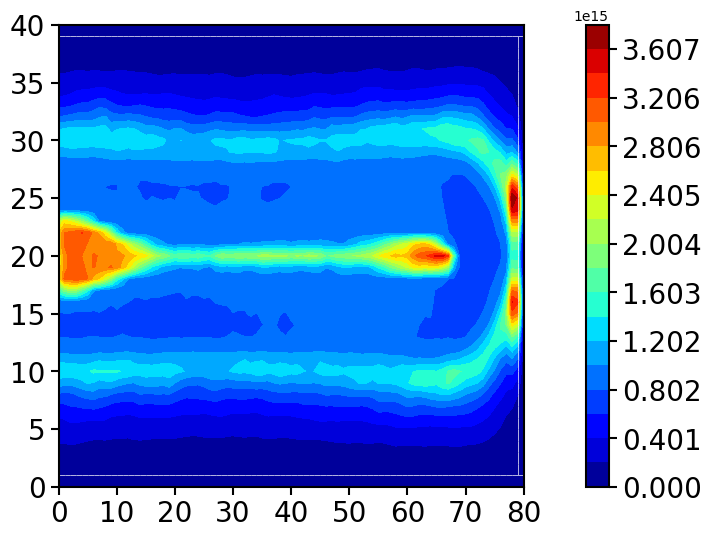

In [10]:
varname = 'RhoOne-Electron'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(
    rr, zz, get_mean_field(h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./ne-2d')

/tmp/ipykernel_3030364/1070573821.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


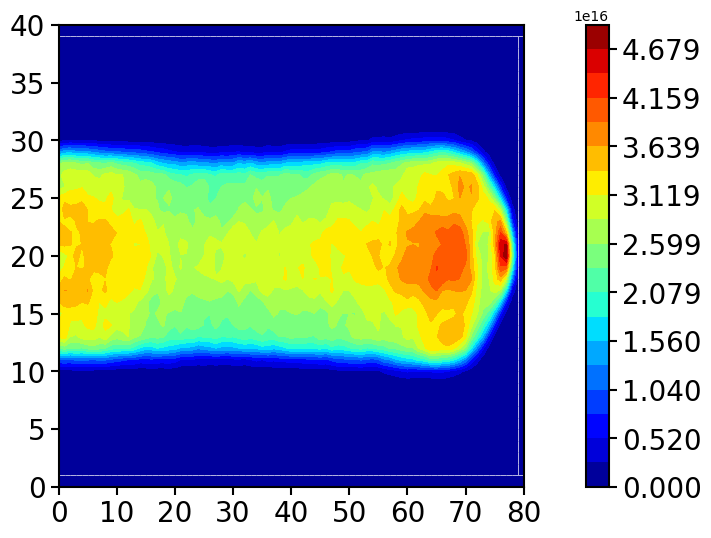

In [11]:
varname = 'RhoOne-F-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./ni-2d')

/tmp/ipykernel_3030364/704153318.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


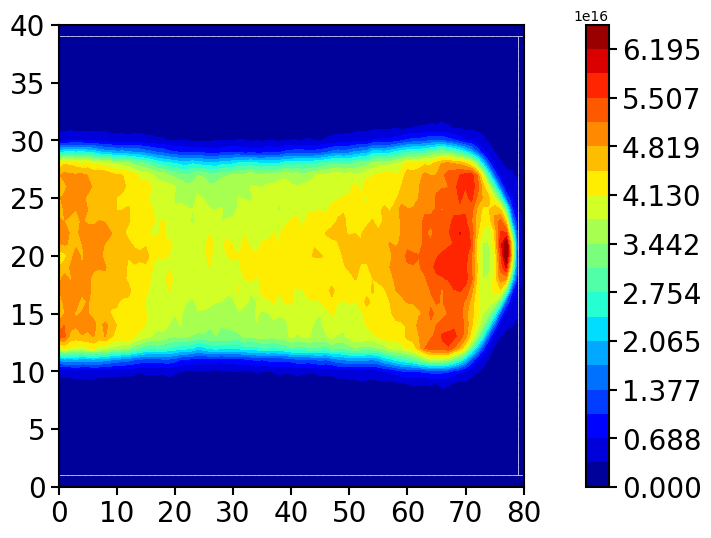

In [12]:
varname = 'RhoOne-CF3+'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./ni-2d')

/tmp/ipykernel_3030364/967157555.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


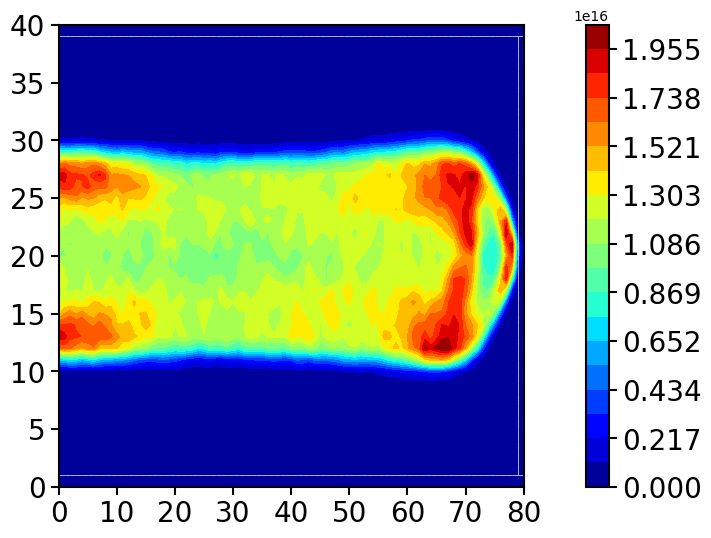

In [13]:
varname = 'RhoOne-CF3-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./ni-2d')

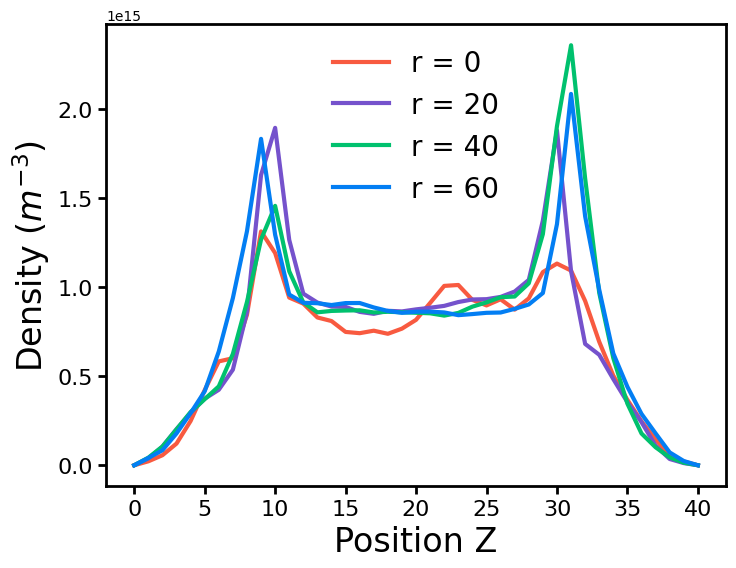

In [14]:
varname = 'RhoOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
zpos = np.arange(Nz)

font, size = curvestyle()

index = 0
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[0], label='r = {}'.format(index))
index = int(Nr / 4)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[1], label='r = {}'.format(index))
index = int(Nr / 4 * 2)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[2], label='r = {}'.format(index))
index = int(Nr / 4 * 3)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[3], label='r = {}'.format(index))

plt.xlabel('Position Z', fontdict=font)
plt.ylabel('Density ($m^{-3}$)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./ne_zpos')

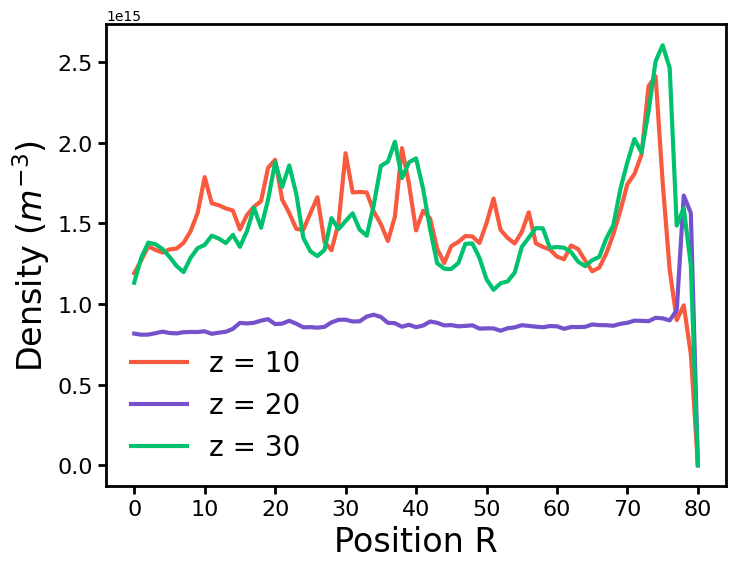

In [15]:
varname = 'RhoOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
rpos = np.arange(Nr)

font, size = curvestyle()

index = int(Nz / 4)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[0], label='z = {}'.format(index))
index = int(Nz / 4 * 2)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[1], label='z = {}'.format(index))
index = int(Nz / 4 * 3)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[2], label='z = {}'.format(index))

plt.xlabel('Position R', fontdict=font)
plt.ylabel('Density ($m^{-3}$)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend( prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./ne_rpos')

/tmp/ipykernel_3030364/1497534067.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


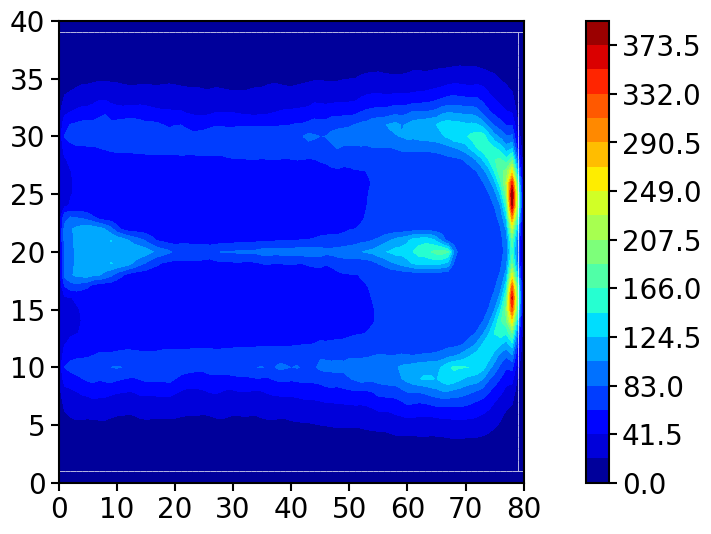

In [16]:
varname = 'MPOne-Electron'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(
    rr, zz, get_mean_field(h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./me-2d')

/tmp/ipykernel_3030364/3041395564.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


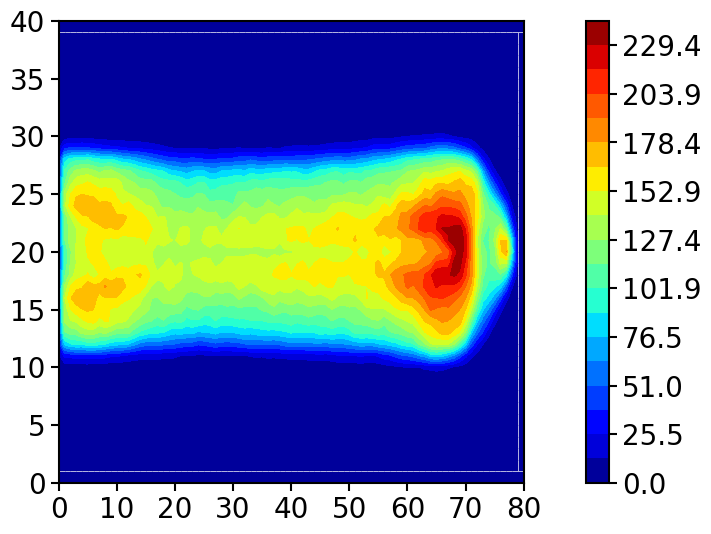

In [17]:
varname = 'MPOne-F-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(
    rr, zz, get_mean_field(h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./mi-2d')

/tmp/ipykernel_3030364/1862659751.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


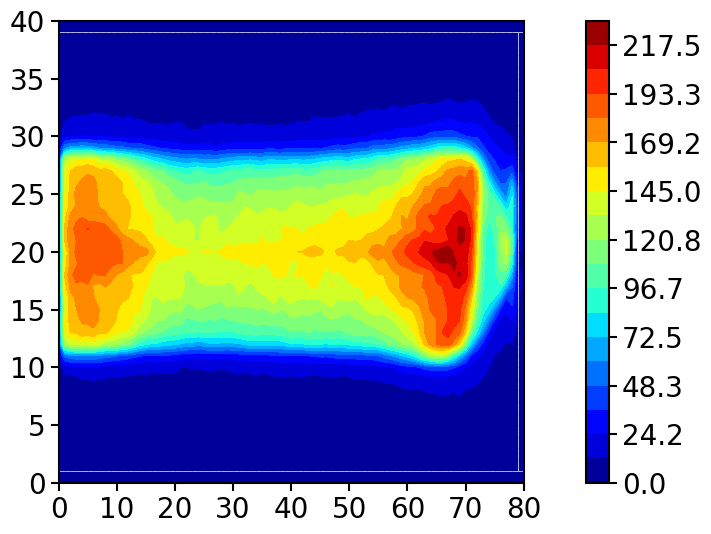

In [18]:
varname = 'MPOne-CF3+'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(
    rr, zz, get_mean_field(h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./mi-2d')

/tmp/ipykernel_3030364/3115394270.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


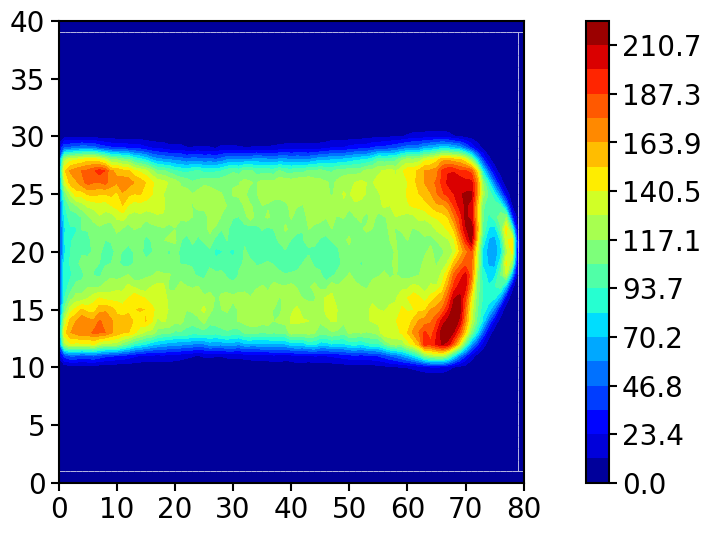

In [19]:
varname = 'MPOne-CF3-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(
    rr, zz, get_mean_field(h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./mi-2d')

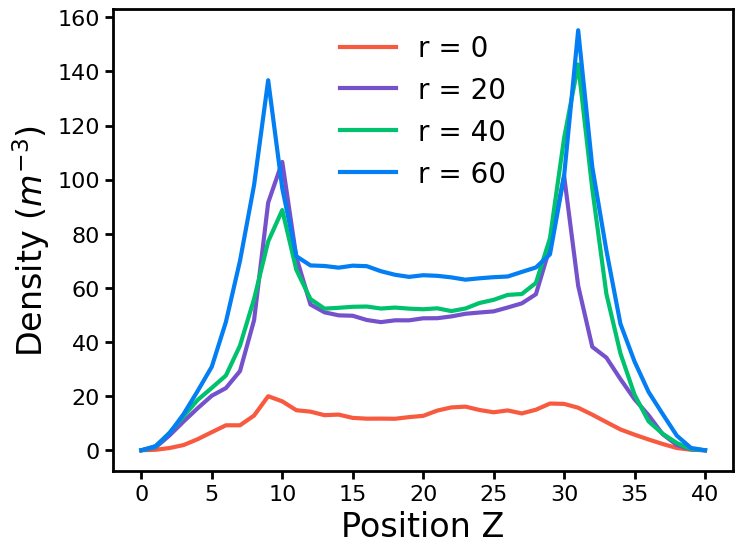

In [20]:
varname = 'MPOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
zpos = np.arange(Nz)

font, size = curvestyle()

index = 0
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[0], label='r = {}'.format(index))
index = int(Nr / 4)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[1], label='r = {}'.format(index))
index = int(Nr / 4 * 2)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[2], label='r = {}'.format(index))
index = int(Nr / 4 * 3)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[3], label='r = {}'.format(index))

plt.xlabel('Position Z', fontdict=font)
plt.ylabel('Density ($m^{-3}$)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./me_zpos')

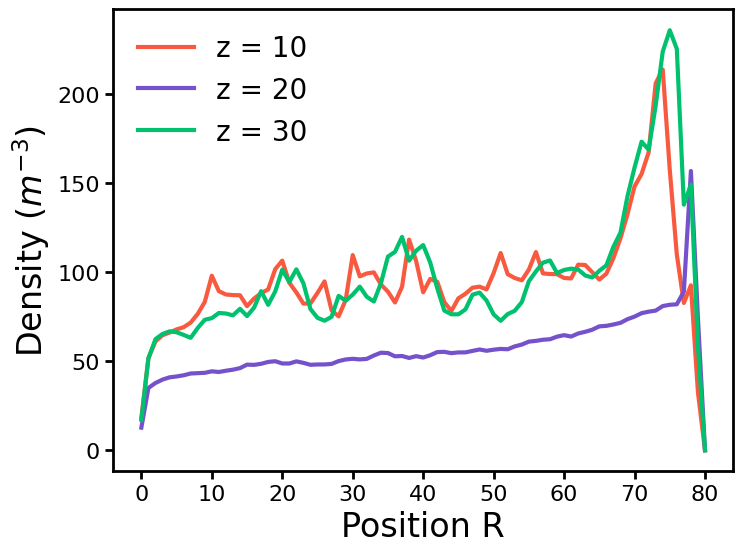

In [21]:
varname = 'MPOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
rpos = np.arange(Nr)

font, size = curvestyle()

index = int(Nz / 4)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[0], label='z = {}'.format(index))
index = int(Nz / 4 * 2)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[1], label='z = {}'.format(index))
index = int(Nz / 4 * 3)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[2], label='z = {}'.format(index))

plt.xlabel('Position R', fontdict=font)
plt.ylabel('Density ($m^{-3}$)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend( prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./me_rpos')

/tmp/ipykernel_3030364/2000388924.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


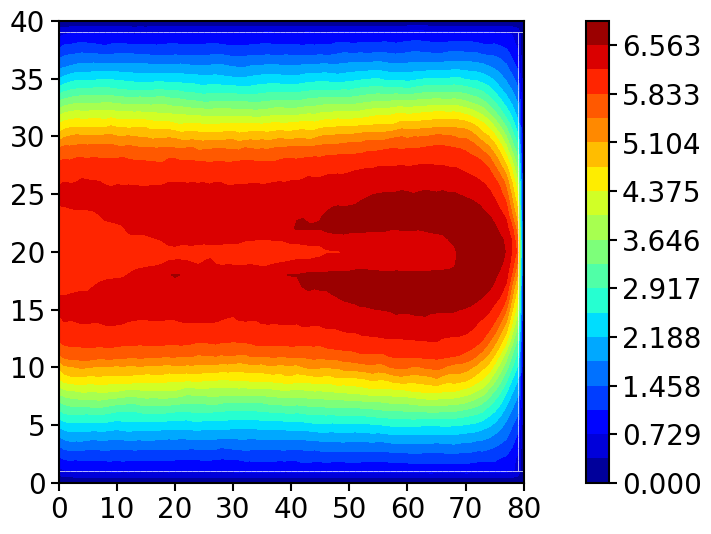

In [22]:
varname = 'EnergyOne-Electron'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Te-2d')

/tmp/ipykernel_3030364/1964058366.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


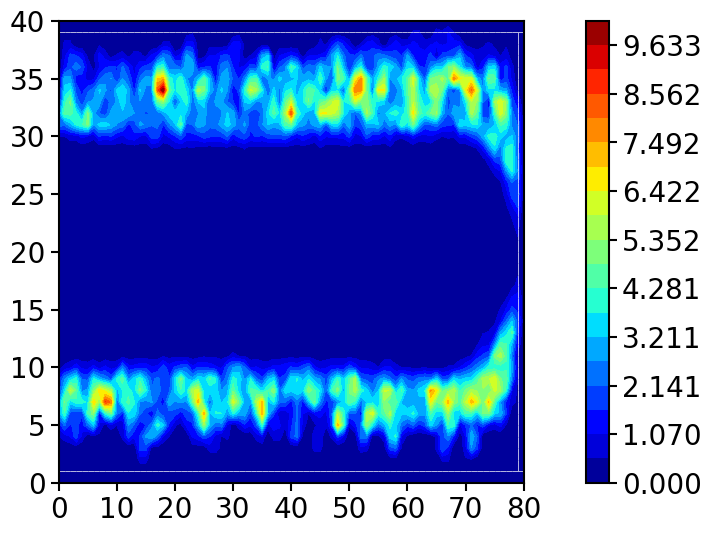

In [23]:
varname = 'EnergyOne-F-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Ti-2d')

/tmp/ipykernel_3030364/956798870.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


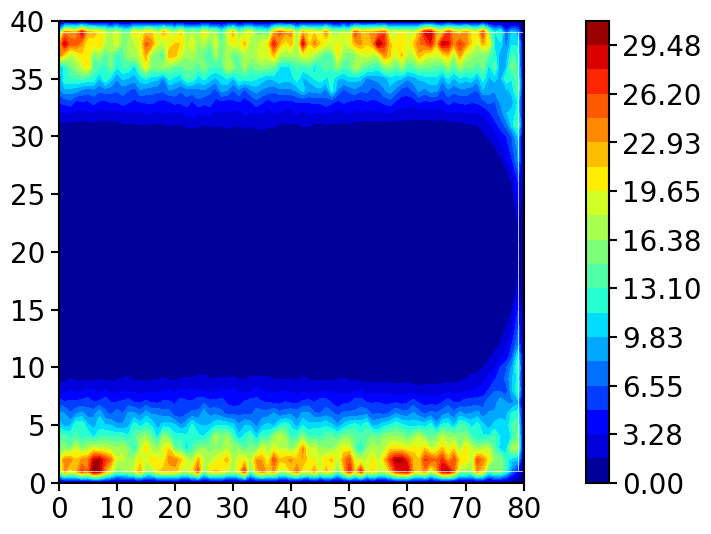

In [24]:
varname = 'EnergyOne-CF3+'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Ti-2d')

/tmp/ipykernel_3030364/191139413.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


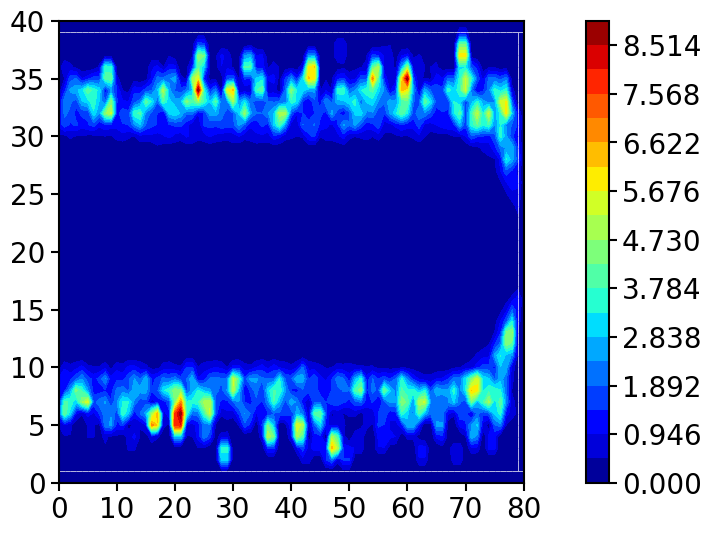

In [25]:
varname = 'EnergyOne-CF3-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False, z_min=0)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Ti-2d')

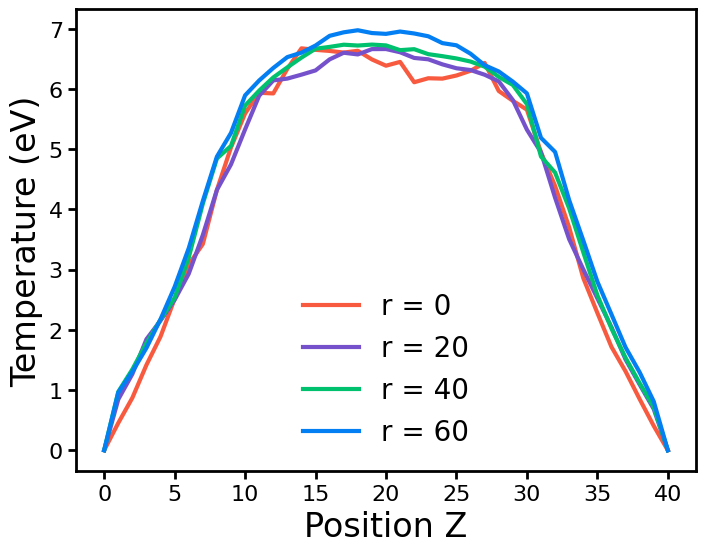

In [26]:
varname = 'EnergyOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
zpos = np.arange(Nz)

font, size = curvestyle()

index = 0
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[0], label='r = {}'.format(index))
index = int(Nr / 4)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[1], label='r = {}'.format(index))
index = int(Nr / 4 * 2)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[2], label='r = {}'.format(index))
index = int(Nr / 4 * 3)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[3], label='r = {}'.format(index))

plt.xlabel('Position Z', fontdict=font)
plt.ylabel('Temperature (eV)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./Te_zpos')

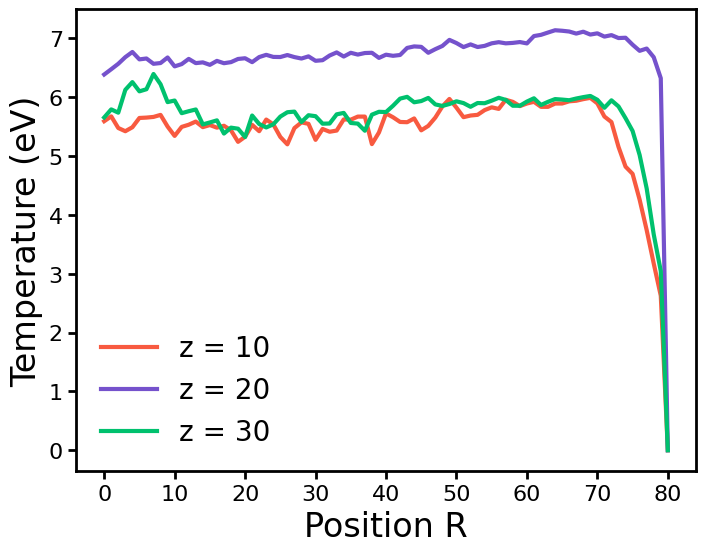

In [27]:
varname = 'EnergyOne-Electron'
time_index = -1

rho_2d = h5files[time_index][varname]
rpos = np.arange(Nr)

font, size = curvestyle()

index = int(Nz / 4)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[0], label='z = {}'.format(index))
index = int(Nz / 4 * 2)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[1], label='z = {}'.format(index))
index = int(Nz / 4 * 3)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[2], label='z = {}'.format(index))

plt.xlabel('Position R', fontdict=font)
plt.ylabel('Temperature (eV)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./Te_rpos')

/tmp/ipykernel_3030364/3100237138.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


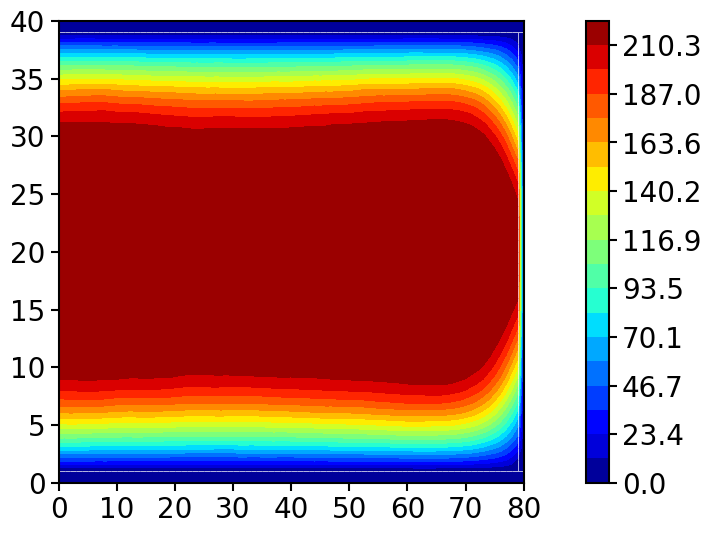

In [28]:
varname = 'Phi'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./phi-2d')

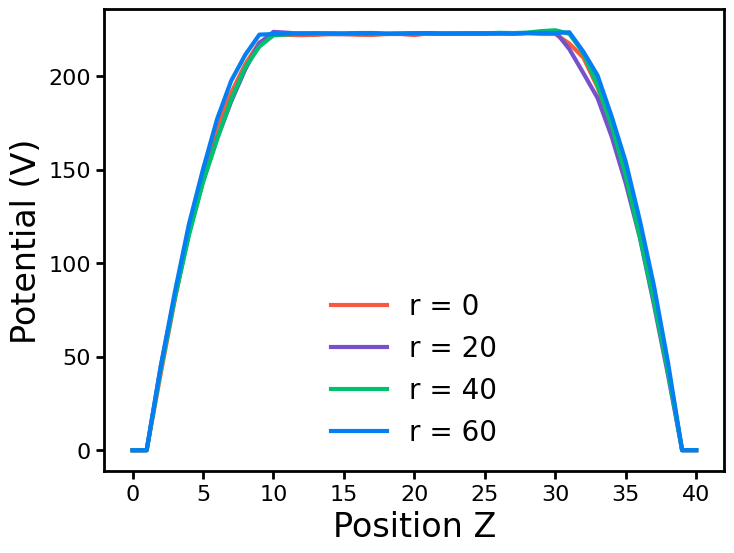

In [29]:
varname = 'Phi'
time_index = -1

rho_2d = h5files[time_index][varname]
zpos = np.arange(Nz)

font, size = curvestyle()

index = 0
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[0], label='r = {}'.format(index))
index = int(Nr / 4)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[1], label='r = {}'.format(index))
index = int(Nr / 4 * 2)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[2], label='r = {}'.format(index))
index = int(Nr / 4 * 3)
plt.plot(zpos, rho_2d[index, :], lw=3, c=colors[3], label='r = {}'.format(index))

plt.xlabel('Position Z', fontdict=font)
plt.ylabel('Potential (V)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./phi_zpos')

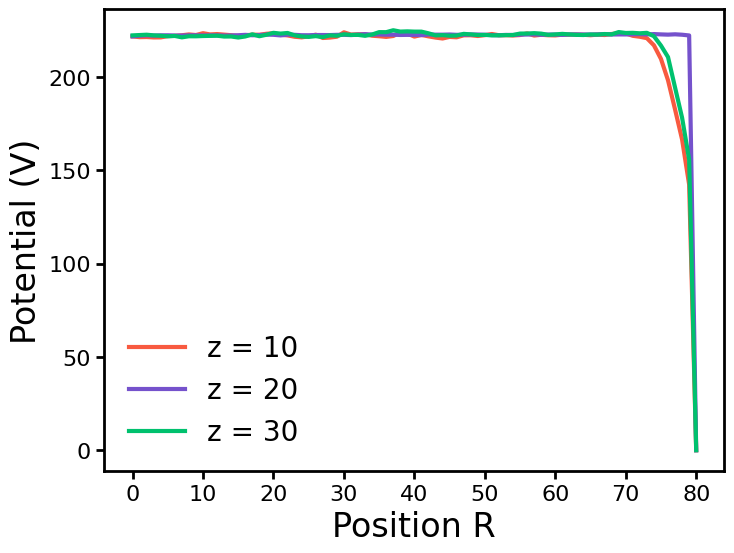

In [30]:
varname = 'Phi'
time_index = -1

rho_2d = h5files[time_index][varname]
rpos = np.arange(Nr)

font, size = curvestyle()

index = int(Nz / 4)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[0], label='z = {}'.format(index))
index = int(Nz / 4 * 2)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[1], label='z = {}'.format(index))
index = int(Nz / 4 * 3)
plt.plot(rpos, rho_2d[:, index], lw=3, c=colors[2], label='z = {}'.format(index))

plt.xlabel('Position R', fontdict=font)
plt.ylabel('Potential (V)', fontdict=font)
# plt.xlim([-0.1, 1.1])
# plt.ylim([10**18.7, 10**21.2])
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)
plt.legend(prop={'size':20}, frameon=False)

ax = plt.gca()
# ax.xaxis.set_minor_locator(MultipleLocator(0.1))

fs('./phi_rpos')

In [31]:
Ez, Er = calculate_electric_field(
    get_mean_field(h5files, varname, -mean_num), dz, dr)

/tmp/ipykernel_3030364/3060988960.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


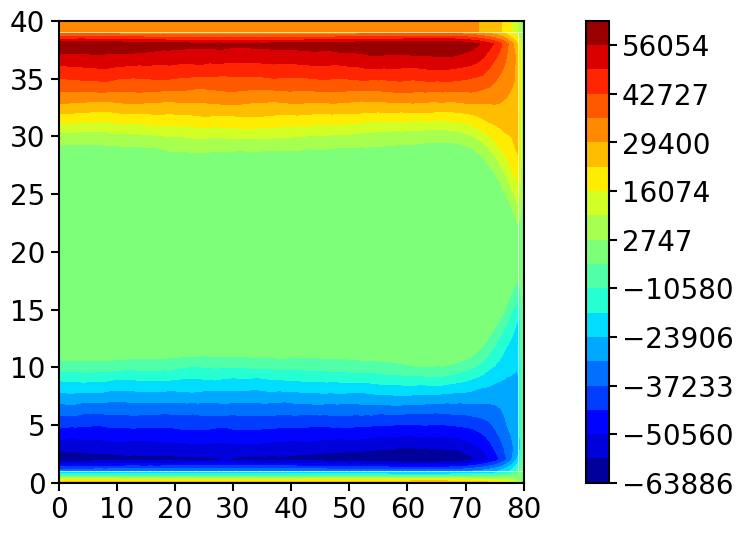

In [32]:
font, size, sm, lims = contour(rr, zz, Ez.T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1,
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Ez-2d')

/tmp/ipykernel_3030364/2808056987.py:5: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


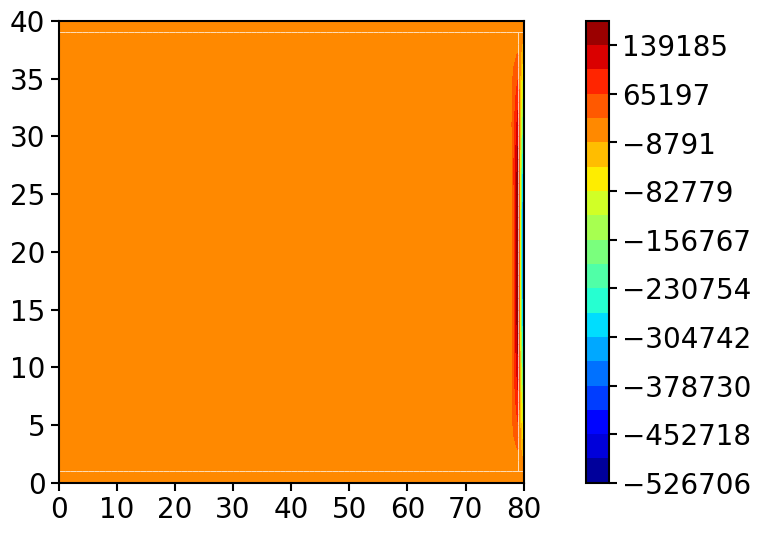

In [33]:
font, size, sm, lims = contour(rr, zz, Er.T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1,
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Er-2d')

/tmp/ipykernel_3030364/1326632556.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


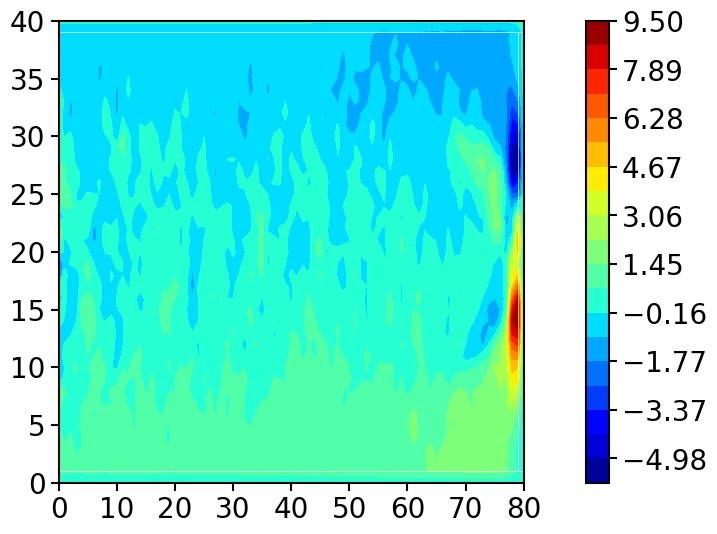

In [34]:
varname = 'JzOne-Electron'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jze-2d')

/tmp/ipykernel_3030364/3515840817.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


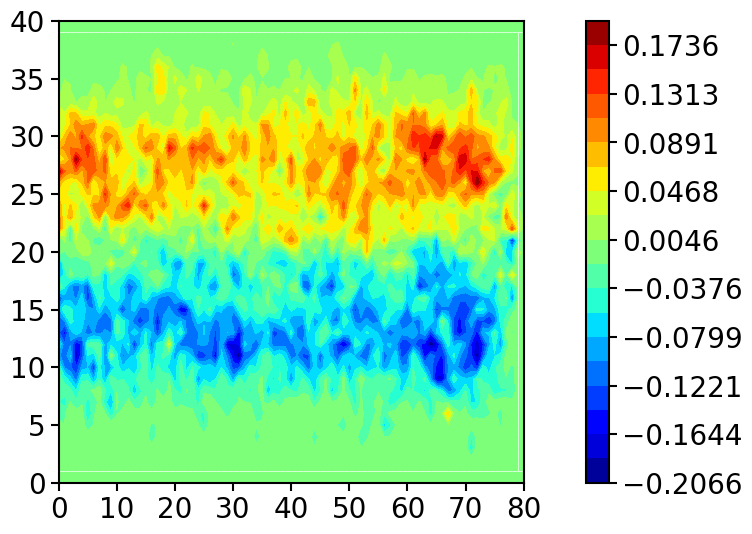

In [35]:
varname = 'JzOne-F-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jzi-2d')

/tmp/ipykernel_3030364/3165774227.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


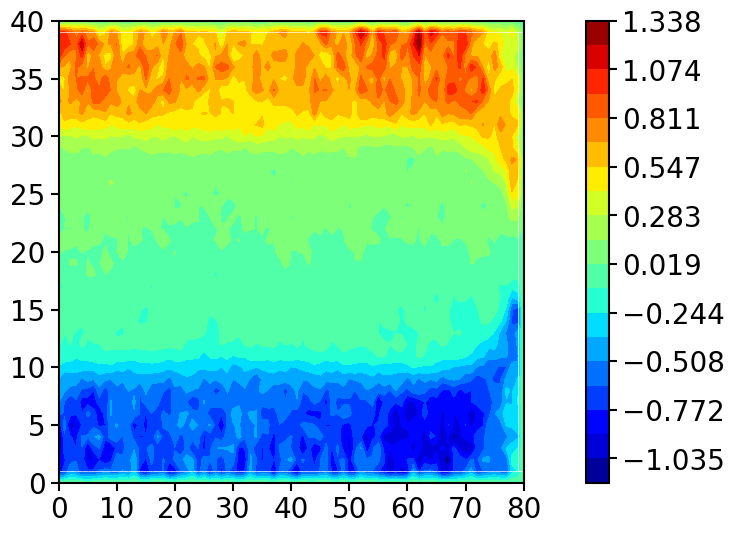

In [36]:
varname = 'JzOne-CF3+'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jzi-2d')

/tmp/ipykernel_3030364/3329967776.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


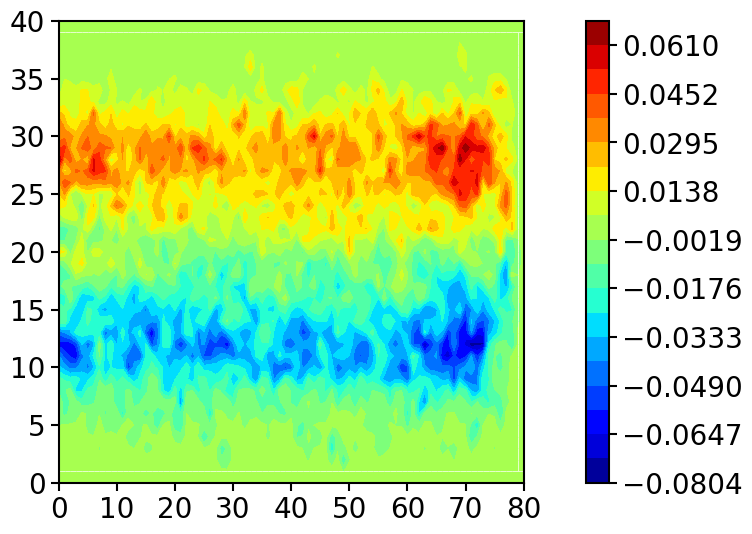

In [37]:
varname = 'JzOne-CF3-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jzi-2d')

/tmp/ipykernel_3030364/472110449.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


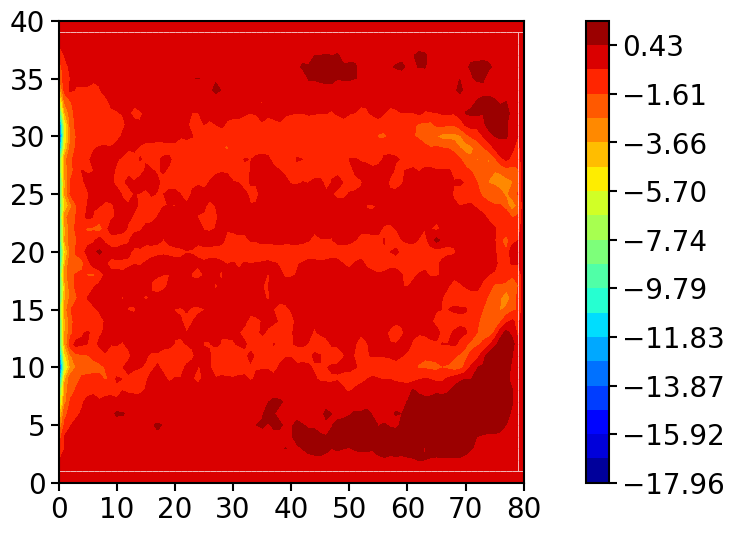

In [38]:
varname = 'JrOne-Electron'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jre-2d')

/tmp/ipykernel_3030364/116812085.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


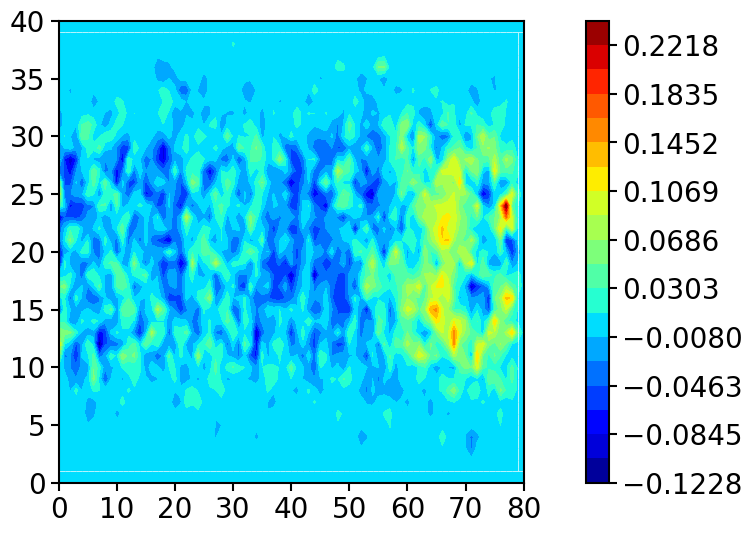

In [39]:
varname = 'JrOne-F-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jri-2d')

/tmp/ipykernel_3030364/4035260228.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


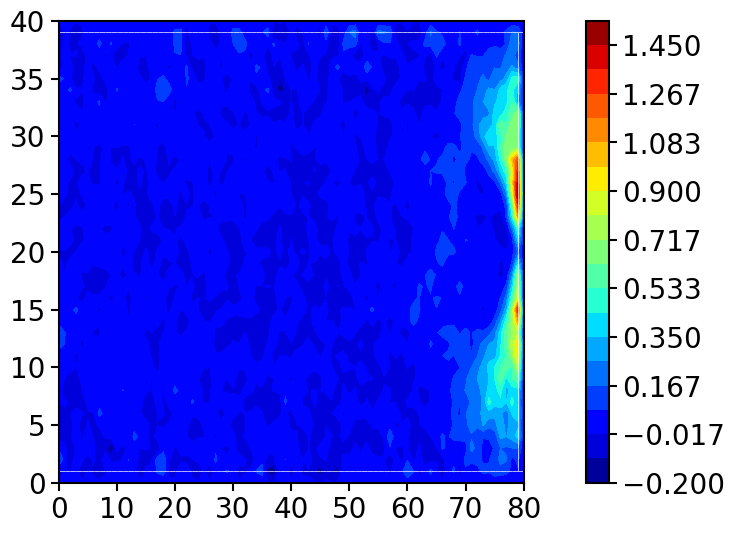

In [40]:
varname = 'JrOne-CF3+'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jri-2d')

/tmp/ipykernel_3030364/3582906734.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cb = plt.colorbar(sm, fraction=0.15, pad=0.1,


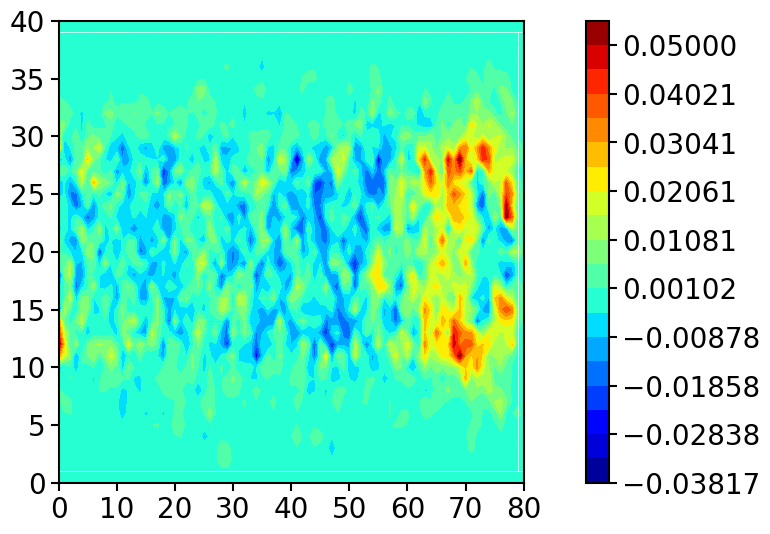

In [41]:
varname = 'JrOne-CF3-'
zpos = np.arange(Nz)
rpos = np.arange(Nr)
[rr, zz] = np.meshgrid(rpos, zpos)
font, size, sm, lims = contour(rr, zz, get_mean_field(
    h5files, varname, -mean_num).T, lev=20, bar=False)
plt.xticks(fontsize=size)
plt.yticks(fontsize=size)

cb = plt.colorbar(sm, fraction=0.15, pad=0.1, 
                  boundaries=lims)
cb.ax.tick_params(labelsize=size)     # 设置色标刻度字体大小
cb.ax.tick_params(length=6, width=1.5)
cb.outline.set_linewidth(1.5)
g.show_grid(is_create_fig=False, color='w')
# draw_domain(domain_info[0], is_create_fig=False, color='w')

fs('./Jri-2d')